# Data Collection

In [1]:
import pandas as pd

In [2]:
# Reading the file using pandas
data=pd.read_excel("StoresData.xlsx")
# Display the first 5 rows of data
print (data.head())

   Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0          1      12.5       2.3         60     Mall            2   NSW   
1          2      14.5       2.7         69     Mall            2   Vic   
2          3      19.0       3.1         79  Country            3   Vic   
3          4      18.2       2.6         66     Mall            2   Qld   
4          5       7.6       2.0         51    Strip            1   Qld   

   State (Num)  Age (Yrs)  GrossProfit  ...  Mng-Sex (Num)  Mng-Age  Mng-Exp  \
0            1         10        0.712  ...              0       33       12   
1            2          8        0.091  ...              0       33       16   
2            2          7        1.075  ...              0       30        9   
3            3          7        1.372  ...              0       29        9   
4            3         15        2.148  ...              0       36        4   

  Mng-Train  Union% Car Spaces  HomeDel  HomeDel (Num)  Basket:2013 

In [3]:
# Check columns
print(data.columns)

Index(['Store No.', 'Sales $m', 'Wages $m', 'No. Staff', 'Location',
       'Loc'n (Num)', 'State', 'State (Num)', 'Age (Yrs)', 'GrossProfit',
       'Adv.$'000', 'Competitors', 'HrsTrading', 'Sundays', 'Sundays (Num)',
       'Mng-Sex', 'Mng-Sex (Num)', 'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%',
       'Car Spaces', 'HomeDel', 'HomeDel (Num)', 'Basket:2013', 'Basket:2014'],
      dtype='object')


# Data Cleaning

In [4]:
# Basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

In [5]:
print(data.isnull().sum())

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64


In [6]:
# Basic stats for numeric columns
print(data.describe())

        Store No.    Sales $m    Wages $m   No. Staff  Loc'n (Num)  \
count  150.000000  150.000000  150.000000  150.000000   150.000000   
mean    75.500000   11.659333    2.376667   61.493333     1.913333   
std     43.445368    3.570989    0.567866   14.605206     0.767954   
min      1.000000    5.900000    1.500000   35.000000     1.000000   
25%     38.250000    8.825000    1.900000   51.000000     1.000000   
50%     75.500000   10.950000    2.200000   58.000000     2.000000   
75%    112.750000   14.000000    2.700000   69.750000     2.750000   
max    150.000000   23.500000    3.900000  117.000000     3.000000   

       State (Num)   Age (Yrs)  GrossProfit   Adv.$'000  Competitors  ...  \
count   150.000000  150.000000   150.000000  150.000000   150.000000  ...   
mean      3.033333    8.846667     1.009953  147.273333     2.506667  ...   
std       1.894594    5.442483     0.645794   67.994265     1.744586  ...   
min       1.000000    1.000000     0.018000   20.000000     0

In [7]:
#sum duplicated
print(data.duplicated().sum())

0


In [8]:
data.dtypes

Store No.          int64
Sales $m         float64
Wages $m         float64
No. Staff          int64
Location          object
Loc'n (Num)        int64
State             object
State (Num)        int64
Age (Yrs)          int64
GrossProfit      float64
Adv.$'000          int64
Competitors        int64
HrsTrading         int64
Sundays           object
Sundays (Num)      int64
Mng-Sex           object
Mng-Sex (Num)      int64
Mng-Age            int64
Mng-Exp            int64
Mng-Train          int64
Union%             int64
Car Spaces         int64
HomeDel           object
HomeDel (Num)      int64
Basket:2013        int64
Basket:2014        int64
dtype: object

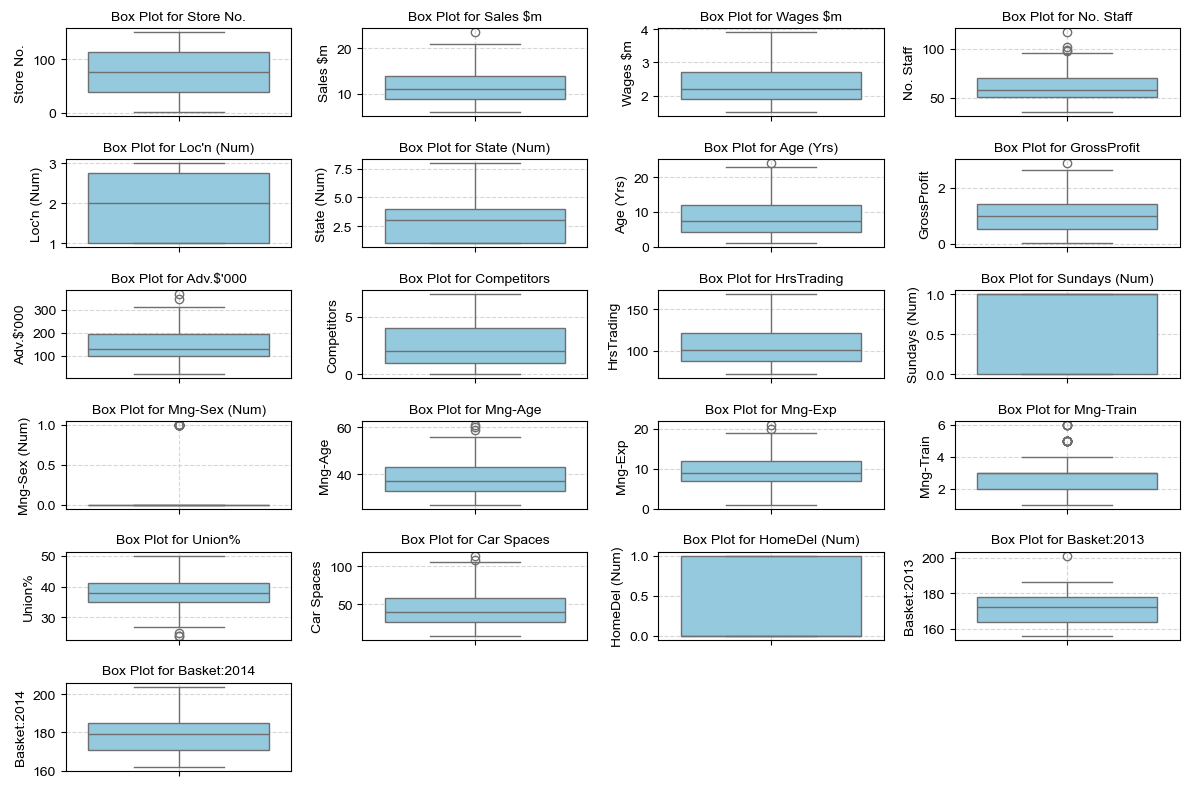

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of columns (let's use a fixed number of columns, for example, 4)
num_cols = 4

# Get a list of all numeric columns from your DataFrame
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed for the subplot layout
num_rows = (len(numerical_columns) // num_cols) + (1 if len(numerical_columns) % num_cols != 0 else 0)

# Set the figure size for the plots
plt.figure(figsize=(12, 8))

# Loop through each numerical column and create a box plot
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Define position in the subplot grid
    sns.boxplot(y=data[col], color='skyblue')  # Create a vertical box plot for the column
    plt.title(f'Box Plot for {col}', fontsize=10)  # Title for each plot
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Ensure the plots don't overlap
sns.set_style("darkgrid")
plt.show()  # Display all the plots

In [10]:
# Calculate the first (Q1) and third (Q3) quartiles for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)

# Define the acceptable data limits (within 1.5 times the IQR)
filtered_df = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the cleaned data (after removing outliers)
print(filtered_df)

     Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0            1      12.5       2.3         60     Mall            2   NSW   
1            2      14.5       2.7         69     Mall            2   Vic   
2            3      19.0       3.1         79  Country            3   Vic   
3            4      18.2       2.6         66     Mall            2   Qld   
4            5       7.6       2.0         51    Strip            1   Qld   
..         ...       ...       ...        ...      ...          ...   ...   
144        145       7.9       2.0         51    Strip            1   Qld   
146        147       8.1       1.7         58  Country            3   NSW   
147        148      13.6       2.9         66    Strip            1    WA   
148        149      10.0       2.0         55     Mall            2    WA   
149        150      11.6       2.2         60  Country            3   ACT   

     State (Num)  Age (Yrs)  GrossProfit  ...  Mng-Sex (Num)  Mng-Age  \
0 

In [11]:
# Display summary statistics of the cleaned data to ensure proper cleaning
print(filtered_df.describe())

        Store No.   Sales $m   Wages $m  No. Staff  Loc'n (Num)  State (Num)  \
count   99.000000  99.000000  99.000000  99.000000    99.000000    99.000000   
mean    76.151515  11.604040   2.342424  60.464646     1.959596     2.666667   
std     45.321609   3.253975   0.525491  12.381119     0.754837     1.702339   
min      1.000000   6.200000   1.600000  39.000000     1.000000     1.000000   
25%     38.500000   9.100000   1.900000  51.000000     1.000000     1.000000   
50%     73.000000  10.900000   2.200000  58.000000     2.000000     2.000000   
75%    113.500000  13.950000   2.650000  67.500000     3.000000     4.000000   
max    150.000000  21.000000   3.600000  91.000000     3.000000     8.000000   

       Age (Yrs)  GrossProfit   Adv.$'000  Competitors  ...  Sundays (Num)  \
count  99.000000    99.000000   99.000000    99.000000  ...      99.000000   
mean    9.323232     1.119505  142.242424     2.272727  ...       0.555556   
std     5.203665     0.615467   63.029648    

In [12]:
# Get all numeric columns (int and float types)
numerical_columns = filtered_df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column to remove outliers individually
for col in numerical_columns:
    Q1 = filtered_df[col].quantile(0.25)         # First quartile (25th percentile)
    Q3 = filtered_df[col].quantile(0.75)         # Third quartile (75th percentile)
    IQR = Q3 - Q1                                # Interquartile Range (IQR)

    # Define the lower and upper bounds for non-outlier data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows where the column value is within the normal range
    df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]
df    

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,7.9,2.0,51,Strip,1,Qld,3,3,1.464,...,0,46,6,4,33,31,Del:No,0,163,169
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


# Data Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler()

# Select only the numerical columns from the DataFrame
numerical_columns =df.select_dtypes(include=['number']).columns

# Apply MinMax scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the normalized DataFrame to a CSV file
df.to_csv('scaled_data_normalized.csv', index=False)

# Display the first 5 rows of the scaled DataFrame
print(df.head())

   Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0   0.000000  0.425676      0.35   0.403846     Mall          0.5   NSW   
1   0.006711  0.560811      0.55   0.576923     Mall          0.5   Vic   
2   0.013423  0.864865      0.75   0.769231  Country          1.0   Vic   
3   0.020134  0.810811      0.50   0.519231     Mall          0.5   Qld   
4   0.026846  0.094595      0.20   0.230769    Strip          0.0   Qld   

   State (Num)  Age (Yrs)  GrossProfit  ...  Mng-Sex (Num)   Mng-Age  \
0     0.000000       0.40     0.262751  ...            0.0  0.230769   
1     0.142857       0.30     0.022798  ...            0.0  0.230769   
2     0.142857       0.25     0.403014  ...            0.0  0.115385   
3     0.285714       0.25     0.517774  ...            0.0  0.076923   
4     0.285714       0.65     0.817620  ...            0.0  0.346154   

    Mng-Exp Mng-Train    Union% Car Spaces  HomeDel  HomeDel (Num)  \
0  0.611111  0.333333  0.454545   0.422222   D

# Split data set into train data and test data 

In [14]:
from sklearn.model_selection import train_test_split
data= pd.read_csv('scaled_data_normalized.csv')
data
x= data.drop('Basket:2014', axis=1)
y=data['Basket:2014']
x_train, x_test, y_train, y_test= train_test_split( x,y, test_size=0.2,
                                       random_state=42)
x_train.to_csv('x_train.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("successfully")

successfully


# Application of Mining Techniques

# fuzzy logic

In [15]:
# Import required libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import warnings

In [16]:
# 1. Data Loading & Preprocessing
# Load data
x_train = pd.read_csv("x_train.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

# Handle missing values
numeric_cols = ['Sales $m', 'Wages $m', "Loc'n (Num)"]
imputer = SimpleImputer(strategy='mean')

x_train[numeric_cols] = imputer.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = imputer.transform(x_test[numeric_cols])


In [17]:
# 2. Enhanced Fuzzy System Setup
# Define antecedents with extended ranges
sales = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'sales')
wages = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'wages')
location = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'location')

# Define consequent with extended resolution
basket_2014 = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'basket_2014')

# Enhanced membership functions with overlap
sales['low'] = fuzz.trapmf(sales.universe, [0, 0, 0.25, 0.5])
sales['medium'] = fuzz.trapmf(sales.universe, [0.3, 0.45, 0.65, 0.8])
sales['high'] = fuzz.trapmf(sales.universe, [0.6, 0.75, 1, 1])

wages['low'] = fuzz.trapmf(wages.universe, [0, 0, 0.3, 0.55])
wages['medium'] = fuzz.trapmf(wages.universe, [0.4, 0.5, 0.7, 0.85])
wages['high'] = fuzz.trapmf(wages.universe, [0.65, 0.8, 1, 1])

location['strip'] = fuzz.trapmf(location.universe, [0, 0, 0.35, 0.6])
location['mall'] = fuzz.trapmf(location.universe, [0.4, 0.55, 0.75, 0.9])
location['country'] = fuzz.trapmf(location.universe, [0.7, 0.85, 1, 1])

basket_2014['small'] = fuzz.trapmf(basket_2014.universe, [0, 0, 0.2, 0.45])
basket_2014['medium'] = fuzz.trapmf(basket_2014.universe, [0.3, 0.5, 0.7, 0.9])
basket_2014['large'] = fuzz.trapmf(basket_2014.universe, [0.65, 0.8, 1, 1])


In [18]:
# Comprehensive rule set
rules = [
    ctrl.Rule(sales['high'] & location['mall'], basket_2014['large']),
    ctrl.Rule(sales['medium'] & wages['low'], basket_2014['medium']),
    ctrl.Rule(location['strip'] & wages['high'], basket_2014['small']),
    ctrl.Rule(sales['low'] & location['country'], basket_2014['small']),
    ctrl.Rule(wages['medium'] & sales['medium'], basket_2014['medium']),
    ctrl.Rule(location['mall'] & wages['medium'], basket_2014['medium']),
    ctrl.Rule(sales['high'] & wages['high'], basket_2014['large']),
    ctrl.Rule(location['country'] & wages['low'], basket_2014['medium']),
    ctrl.Rule(sales['high'] & location['strip'], basket_2014['medium']),
    ctrl.Rule(wages['low'] & location['country'], basket_2014['small']),
    ctrl.Rule(sales['medium'] & location['strip'], basket_2014['medium']),
    ctrl.Rule(
        antecedent=(sales['low'] | sales['medium'] | sales['high']),
        consequent=basket_2014['medium'],
        label='universal_default'
    )
]


In [19]:
# 3. Robust Control System
basket_system = ctrl.ControlSystem(rules)
basket_sim = ctrl.ControlSystemSimulation(basket_system, cache=False, flush_after_run=100)

In [20]:
# 4. Enhanced Prediction Function
def fuzzy_predict(X):
    predictions = []
    for idx, row in X.iterrows():
        try:
            sales_val = max(0, min(1, row['Sales $m']))
            wages_val = max(0, min(1, row['Wages $m']))
            loc_val = row["Loc'n (Num)"]
            if loc_val not in [0, 0.5, 1]:
                loc_val = round(loc_val * 2) / 2
            basket_sim.input['sales'] = sales_val
            basket_sim.input['wages'] = wages_val
            basket_sim.input['location'] = loc_val
            basket_sim.compute()
            output = max(0, min(1, basket_sim.output['basket_2014']))
            predictions.append(output)
            
        except Exception as e:
            print(f"Processing row {idx}: {str(e)}")
            predictions.append(0.5)
    return predictions


In [21]:
# 5. Execution & Evaluation
y_pred = fuzzy_predict(x_test)
mae = mean_absolute_error(y_test['Basket:2014'], y_pred)
rmse = np.sqrt(mean_squared_error(y_test['Basket:2014'], y_pred))

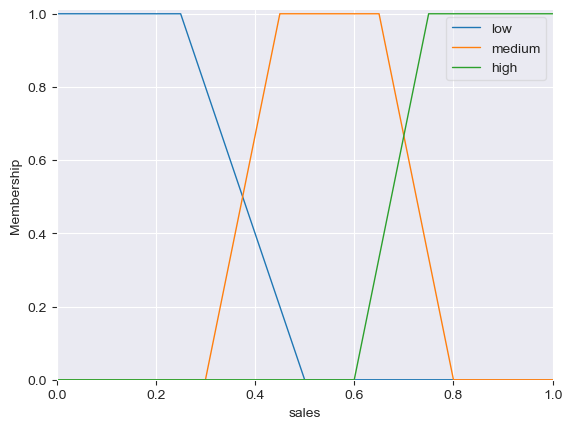

In [22]:
# 6. Visualization Section
warnings.filterwarnings('ignore', category=UserWarning) 
sales.view()


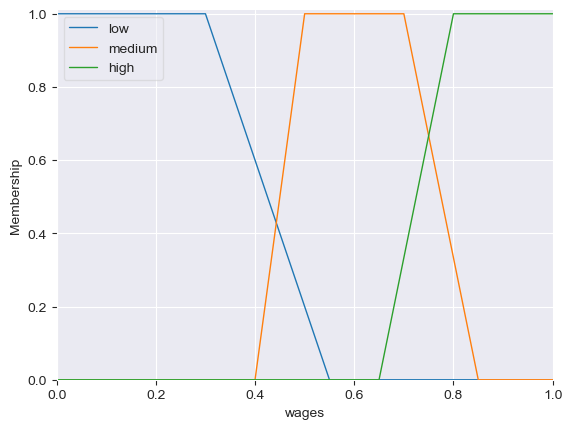

In [23]:
wages.view()

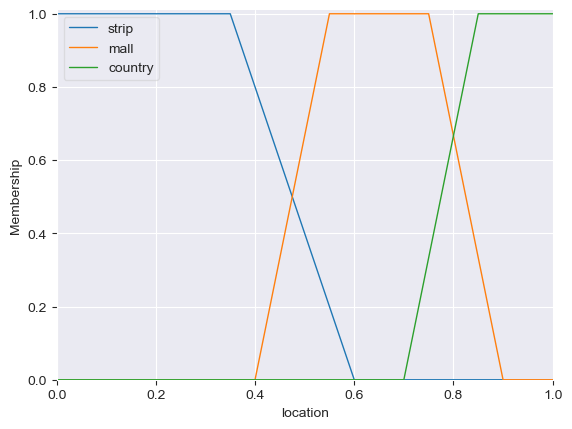

In [24]:
location.view()

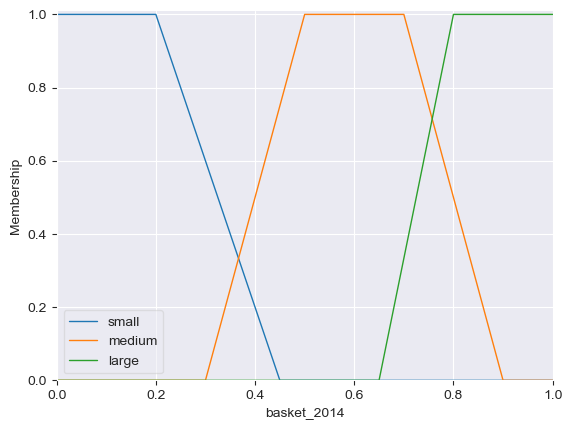

In [25]:
basket_2014.view()

In [26]:
print("\nFinal Model Performance:")
print(f"- MAE: {mae:.3f}")
print(f"- RMSE: {rmse:.3f}")
print(f"- Coverage: {100 * len(y_pred)/len(x_test):.1f}%")


Final Model Performance:
- MAE: 0.215
- RMSE: 0.264
- Coverage: 100.0%
